# Лаба 5

In [19]:
import matplotlib.pyplot as plt
import numpy as np

In [20]:
# функции тестирования
%%writefile test_score.py
import pytest
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

@pytest.fixture()
def load_ys():
  ys = np.loadtxt("ys.csv", delimiter=",")
  return(ys)

@pytest.fixture()
def load_approx():
  approx = np.loadtxt("approx.csv", delimiter=",")
  return(approx)

def test_mse(load_ys, load_approx):
  assert mean_squared_error(load_ys, load_approx) < 1

def test_r2(load_ys, load_approx):
  assert r2_score(load_ys, load_approx) > 0.9

Overwriting test_score.py


## 1-й датасет (+обучение)

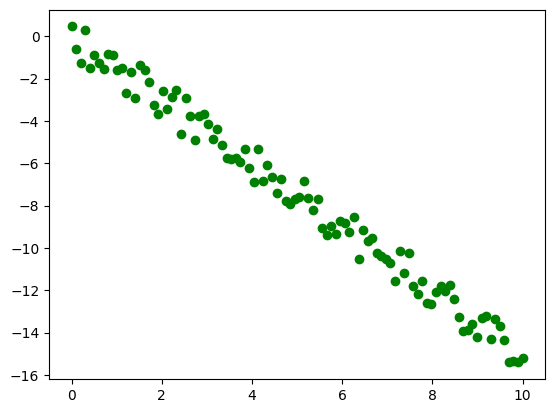

In [21]:
xs = np.linspace(0,10,100)
ys = -1.5 * xs + np.random.random(100)*2 -1

plt.scatter(xs,ys, c='green')
plt.show()

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

reg = LinearRegression()
reg.fit(xs.reshape(-1,1), ys)
approx = reg.predict(xs.reshape(-1,1))
print("mean_squared_error: %.2f" % mean_squared_error(ys, approx))
print("coefficient of determination: %.2f" % r2_score(ys, approx))
print("coefficients: ", reg.coef_)

mean_squared_error: 0.32
coefficient of determination: 0.98
coefficients:  [-1.508398]


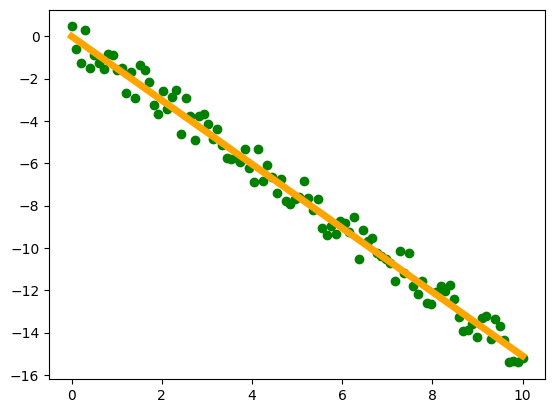

In [23]:
plt.scatter(xs,ys, c='green')
plt.plot(xs.reshape(-1,1), approx, color="orange", linewidth=5)
plt.show()
np.savetxt("ys.csv", ys, delimiter=",")
np.savetxt("approx.csv", approx, delimiter=",")

In [24]:
# тестирую 1-й датасет
!pytest -v test_score.py

============================= test session starts ==============================
platform linux -- Python 3.10.12, pytest-7.2.2, pluggy-1.0.0 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content
plugins: anyio-3.6.2
collected 2 items                                                              

test_score.py::test_mse PASSED                                           [ 50%]
test_score.py::test_r2 PASSED                                            [100%]

============================== 2 passed in 0.65s ===============================


Все тесты выполнены успешно, следовательно, качество предсказания удовлетворительное.

## 2-й датасет

mean_squared_error: 1.96
coefficient of determination: 0.91
coefficients:  [-1.508398]


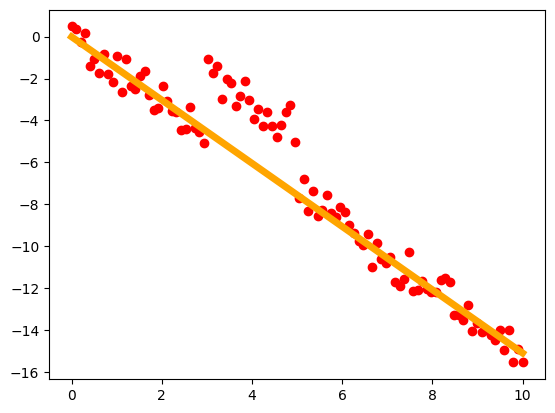

In [25]:
xs = np.linspace(0,10,100)
ys = -1.5 * xs + np.random.random(100)*2 -1
ys[30:50] += 3    # шум

approx = reg.predict(xs.reshape(-1,1))
print("mean_squared_error: %.2f" % mean_squared_error(ys, approx))
print("coefficient of determination: %.2f" % r2_score(ys, approx))
print("coefficients: ", reg.coef_)

plt.scatter(xs,ys, c='red')
plt.plot(xs.reshape(-1,1), approx, color="orange", linewidth=5)
plt.show()
np.savetxt("ys.csv", ys, delimiter=",")
np.savetxt("approx.csv", approx, delimiter=",")

In [26]:
# тестирую 2-й датасет
!pytest -v test_score.py

============================= test session starts ==============================
platform linux -- Python 3.10.12, pytest-7.2.2, pluggy-1.0.0 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content
plugins: anyio-3.6.2
collected 2 items                                                              

test_score.py::test_mse FAILED                                           [ 50%]
test_score.py::test_r2 PASSED                                            [100%]

=================================== FAILURES ===================================
___________________________________ test_mse ___________________________________

load_ys = array([  0.48223877,   0.36013959,  -0.2810338 ,   0.16101798,
        -1.40506611,  -1.04913377,  -1.7200348 ,  -0.82...-14.24508699, -14.45889142, -13.97796366, -14.96629861,
       -13.98780245, -15.54006895, -14.91895997, -15.54794677])
load_approx = array([-1.17596198e-02, -1.64123054e-01, -3.16486489e-01, -4.68849923e-01,
       -6.21213358e-01, -7.735

Не все тесты выполнены успешно, следовательно, качество предсказания неудовлетворительное.

## 3-й датасет

mean_squared_error: 1.14
coefficient of determination: 0.95
coefficients:  [-1.508398]


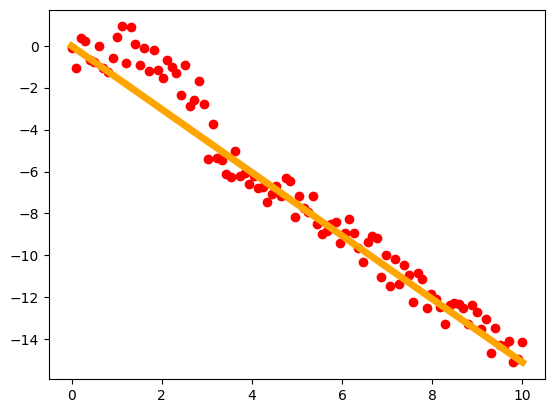

In [27]:
xs = np.linspace(0,10,100)
ys = -1.5 * xs + np.random.random(100)*2 -1
ys[10:30] += 2    # шум

approx = reg.predict(xs.reshape(-1,1))
print("mean_squared_error: %.2f" % mean_squared_error(ys, approx))
print("coefficient of determination: %.2f" % r2_score(ys, approx))
print("coefficients: ", reg.coef_)

plt.scatter(xs,ys, c='red')
plt.plot(xs.reshape(-1,1), approx, color="orange", linewidth=5)
plt.show()
np.savetxt("ys.csv", ys, delimiter=",")
np.savetxt("approx.csv", approx, delimiter=",")

In [28]:
# тестирую 3-й датасет
!pytest -v test_score.py

============================= test session starts ==============================
platform linux -- Python 3.10.12, pytest-7.2.2, pluggy-1.0.0 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content
plugins: anyio-3.6.2
collected 2 items                                                              

test_score.py::test_mse FAILED                                           [ 50%]
test_score.py::test_r2 PASSED                                            [100%]

=================================== FAILURES ===================================
___________________________________ test_mse ___________________________________

load_ys = array([-9.27260238e-02, -1.06446767e+00,  3.90651264e-01,  2.26668402e-01,
       -6.79105478e-01, -7.86804601e-01,  6...9446e+01, -1.42929397e+01, -1.43269088e+01,
       -1.41007301e+01, -1.51076837e+01, -1.49277096e+01, -1.41440629e+01])
load_approx = array([-1.17596198e-02, -1.64123054e-01, -3.16486489e-01, -4.68849923e-01,
       -6.21213358e-01, -7.735

Не все тесты выполнены успешно, следовательно, качество предсказания неудовлетворительное.

## просто тест 1

In [ ]:
%%writefile test.py
import pytest

def test_err():
  assert 1 == 10

def test_ok():
  assert 1 == 1

Overwriting test.py


In [ ]:
!cat test.py

import pytest

def test_err():
  assert 1 == 10

def test_ok():
  assert 1 == 1


In [ ]:
!pytest -v test.py

## просто тест 2

In [ ]:
!mkdir test_module

mkdir: cannot create directory ‘test_module’: File exists


In [ ]:
%%writefile test_module/test_unit.py
import unittest
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

class TestMethods(unittest.TestCase):

  def test_upper(self):
    self.assertEqual("foo".upper(), "FOO")

  def test_mse(self):
    ys = np.loadtxt("ys.csv", delimiter=",")
    approx = np.loadtxt("approx.csv", delimiter=",")
    self.assertTrue(mean_squared_error(ys,approx) < 1)

if __name__ == '__main__':
  unittest.main()

In [ ]:
!python -m unittest test_module/test_unit.py